In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-26 03:42:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-12-26 03:42:52 (16.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    ca-certificates-2019.11.27 |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2019.11.27-0       anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0  anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0   anaconda
    seaborn:         0.9.0-py

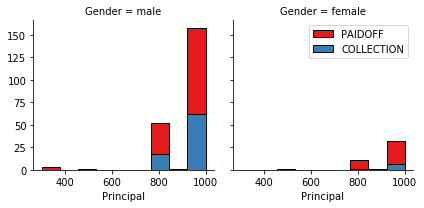

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

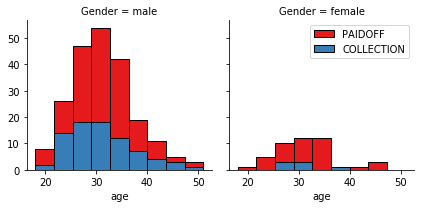

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

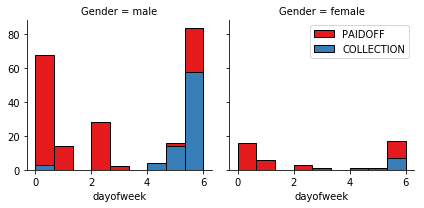

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [178]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
print(len(X))

346


# K Nearest Neighbor Model


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
     
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yp=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yp)

    
    std_acc[n-1]=np.std(yp==y_test)/np.sqrt(yp.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       , 0.68571429,
       0.72857143, 0.72857143, 0.72857143, 0.7       , 0.68571429,
       0.71428571, 0.68571429, 0.7       , 0.7       , 0.72857143,
       0.71428571, 0.77142857, 0.68571429, 0.78571429])

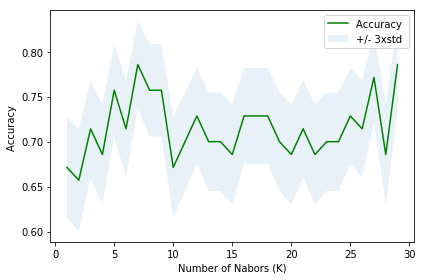

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [80]:
print( "The best KNN MODEL accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best KNN MODEL accuracy was 0.7857142857142857 with k= 7


# Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
KT = 30
mean_acct = np.zeros((KT-1))
std_acct = np.zeros((KT-1))

for n in range(1,Ks):
    
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    ypt=Tree.predict(X_test)
    mean_acct[n-1] = metrics.accuracy_score(y_test, ypt)

    std_acct[n-1]=np.std(ypt==y_test)/np.sqrt(ypt.shape[0])

mean_acct

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ,
       0.7       , 0.71428571, 0.7       , 0.71428571, 0.74285714,
       0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       , 0.7       , 0.68571429, 0.7       , 0.68571429,
       0.7       , 0.68571429, 0.7       , 0.7       ])

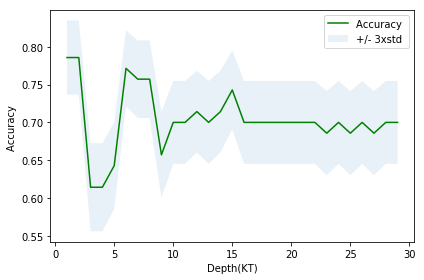

In [61]:
plt.plot(range(1,KT),mean_acct,'g')
plt.fill_between(range(1,KT),mean_acct - 1 * std_acct,mean_acct + 1 * std_acct, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth(KT)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best Decision Tree Model accuracy was with", mean_acct.max(), "with k=", mean_acct.argmax()+1) 

The best Decision Tree Model accuracy was with 0.7857142857142857 with k= 1


# SVM Model


In [74]:
from sklearn import svm

In [75]:
#RBF
SRBF = svm.SVC(kernel='rbf')
SRBF.fit(X_train, y_train) 
ys = SRBF.predict(X_test)
ys [0:5]
print("#1 SVM Radial basis function Accuracy: ", metrics.accuracy_score(y_test, ys))

#1 SVM Radial basis function Accuracy:  0.7428571428571429


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
#Sigmoid
SIG = svm.SVC(kernel='sigmoid')
SIG.fit(X_train, y_train) 
psig = SIG.predict(X_test)
psig [0:5]
print("#2 SVM Sigmoid Accuracy: ", metrics.accuracy_score(y_test, psig1))

#2 SVM Sigmoid Accuracy:  0.7428571428571429


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [90]:
#Ploy
POLY = svm.SVC(kernel='poly')
POLY.fit(X_train, y_train) 
ppoly = POLY.predict(X_test)
ppoly [0:5]
print("#3 SVM Polynomial Accuracy: ", metrics.accuracy_score(y_test, ppoly))

#3 SVM Polynomial Accuracy:  0.7714285714285715


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
print( "The best SVM Model accuracy was", metrics.accuracy_score(y_test, ppoly),"with Plynomial kernel function")

The best SVM Model accuracy was 0.7714285714285715 with Plynomial kernel function


# Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

In [141]:
K = 20
cn = 0
mean_accl = np.zeros((K-1))
std_accl = np.zeros((K-1))

for n in range(1,K):
    cn+=0.01
    LR1 = LogisticRegression(C=cn, solver='liblinear').fit(X_train,y_train)
    plr = LR1.predict(X_test)
    mean_accl[n-1] = metrics.accuracy_score(y_test, plr)

    std_accl[n-1]=np.std(plr==y_test)/np.sqrt(plr.shape[0])
    
    

mean_accl

array([0.68571429, 0.72857143, 0.72857143, 0.72857143, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.74285714, 0.74285714])

In [144]:

K = 20
cn = 0
mean_accl2 = np.zeros((K-1))
std_accl2 = np.zeros((K-1))

for n in range(1,K):
    cn+=0.01
    LR2 = LogisticRegression(C=cn, solver='newton-cg').fit(X_train,y_train)
    plr2 = LR2.predict(X_test)
    mean_accl2[n-1] = metrics.accuracy_score(y_test, plr2)

    std_accl2[n-1]=np.std(plr==y_test)/np.sqrt(plr2.shape[0])
    
mean_accl2


array([0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.75714286, 0.75714286, 0.75714286, 0.75714286, 0.77142857,
       0.77142857, 0.75714286, 0.75714286, 0.75714286, 0.75714286,
       0.75714286, 0.75714286, 0.75714286, 0.75714286])

In [147]:
K = 20
cn = 0
mean_accl3 = np.zeros((K-1))
std_accl3 = np.zeros((K-1))

for n in range(1,K):
    cn+=0.01
    LR3 = LogisticRegression(C=cn, solver='lbfgs').fit(X_train,y_train)
    plr3 = LR3.predict(X_test)
    mean_accl3[n-1] = metrics.accuracy_score(y_test, plr3)

    std_accl3[n-1]=np.std(plr==y_test)/np.sqrt(plr3.shape[0])
    
mean_accl3

array([0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.75714286, 0.75714286, 0.75714286, 0.75714286, 0.77142857,
       0.77142857, 0.75714286, 0.75714286, 0.75714286, 0.75714286,
       0.75714286, 0.75714286, 0.75714286, 0.75714286])

In [148]:
print( "The best SVM Model accuracy was 0.78571429, C=0.01 & solver = lbfgs ")

The best SVM Model accuracy was 0.78571429, C=0.01 & solver = lbfgs 


# Models Evaluation using Test set

In [149]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [150]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-26 05:22:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-12-26 05:22:58 (378 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [153]:
df2 = pd.read_csv('loan_test.csv')
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [154]:
df2.shape

(54, 10)

In [155]:
df2['due_date'] = pd.to_datetime(df2['due_date'])
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [156]:
df2['dayofweek'] = df2['effective_date'].dt.dayofweek
df2['weekend'] = df2['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [182]:
df2['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df2.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [185]:
Feature2 = df2[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(df2['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [186]:
Xt = Feature2
Xt= preprocessing.StandardScaler().fit(Xt).transform(Xt)
print(len(Xt))

54


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [187]:
yt = df2['loan_status'].values
yt[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [188]:
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [201]:
#KNN MODEL
KNN = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
PKNN=KNN.predict(Xt)

print("Avg F1-score: %.4f" % f1_score(yt, PKNN, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(yt, PKNN))



Avg F1-score: 0.6328
Jaccard score: 0.6667


In [202]:
#decision tree
TREE = DecisionTreeClassifier(criterion="entropy", max_depth = 1).fit(X_train,y_train)
ptree=TREE.predict(Xt)

print("Avg F1-score: %.4f" % f1_score(yt, ptree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(yt, ptree))


Avg F1-score: 0.6304
Jaccard score: 0.7407


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
#SVM
SVM1 = svm.SVC(kernel='poly').fit(X_train, y_train) 
psvm = SVM1.predict(X_test)

print("Avg F1-score: %.4f" % f1_score(yt, PKNN, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(yt, PKNN))


Avg F1-score: 0.6328
Jaccard score: 0.6667


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [204]:
#Logistic Regression Model
LR= LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
plr5 = LR.predict(Xt)
plr5_prob = LR.predict_proba(Xt)
print("Avg F1-score: %.4f" % f1_score(yt, PKNN, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(yt, PKNN))
print("Log loss score: %.4f" % log_loss(yt, plr5_prob))

Avg F1-score: 0.6328
Jaccard score: 0.6667
Log loss score: 0.5164
